In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from deepcell.utils.tracking_utils import trks_stats, save_trks

import masks
import gif
import raw
import lineage


import deepcell
from deepcell.utils.tracking_utils import load_trks, trks_stats
from deepcell.utils.misc_utils import sorted_nicely
from deepcell.utils.tracking_utils import load_trks

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [2]:
def get_raw_well(well, video_path="../22956814/22956814.mp4", well_name='A4', filename=False, frame_start=0, frame_end=9001, down_sampling=1):
    print('--------', well_name, '--------')
    frames = []

    ymin = well[0]
    ymax = well[1]
    xmin = well[2]
    xmax = well[3]

    #path = "../22956814/22956814.mp4"
    cap = cv2.VideoCapture(video_path)
    ret = True
    while ret:
        ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            frames.append(img[ymin:ymax, xmin:xmax, :])

    stacked = np.stack(frames, axis=0)
    stacked = stacked.astype(dtype='float32')
    stacked_mean = np.mean(stacked, axis=3)[:,:,:,None]

    if frame_start != 0 or frame_end != 9001 or down_sampling != 1:
        stacked_mean = stacked_mean[frame_start:(frame_end+1):down_sampling, :, :, :]

    if filename:
        output_fn = filename
    else:
        output_fn = 'well_A/raw_%s.npy' % well_name

    np.save(output_fn, stacked_mean)

In [ ]:
import cv2

video_path = '../6814_2/6814_2.mp4'
frames = []
cap = cv2.VideoCapture(video_path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img[0:100, 0:100, :])

stacked = np.stack(frames, axis=0)
stacked = stacked.astype(dtype='float32')
stacked_mean = np.mean(stacked, axis=3)[:,:,:,None]

In [ ]:
stacked_mean.shape

In [ ]:
# An experiment
a = [1,2,3,4,5,6,7,8,9]

a[0:13:2]

In [ ]:
video_path = '../6814_3/6814_3.mp4'
frames = []
cap = cv2.VideoCapture(video_path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img[0:100, 0:100, :])

stacked = np.stack(frames, axis=0)
stacked = stacked.astype(dtype='float32')
stacked_mean = np.mean(stacked, axis=3)[:,:,:,None]

In [ ]:
stacked_mean.shape

In [ ]:
import psutil
psutil.virtual_memory()

In [4]:
# Count wells 
fN1 = '../22956814/22956814_featuresN.hdf5'
fN2 = '../22956819/22956819_featuresN.hdf5'
fN3 = '../22956823/22956823_featuresN.hdf5'

fN4 = '../6814_2/6814_2_featuresN.hdf5'
fN5 = '../6819_2/6819_2_featuresN.hdf5'
fN6 = '../6823_2/6823_2_featuresN.hdf5'

fN7 = '../6814_3/6814_3_featuresN.hdf5'
fN8 = '../6819_3/6819_3_featuresN.hdf5'
fN9 = '../6823_3/6823_3_featuresN.hdf5'

In [5]:
fN1 = h5py.File(fN1)
fN2 = h5py.File(fN2)
fN3 = h5py.File(fN3)

fN4 = h5py.File(fN4)
fN5 = h5py.File(fN5)
fN6 = h5py.File(fN6)

fN7 = h5py.File(fN7)
fN8 = h5py.File(fN8)
fN9 = h5py.File(fN9)

In [13]:
# Define dorsal and ventral coordinates
def create_well_dict_1(featureN):
    fN = h5py.File(featureN)
    coordinates = fN['coordinates']
    dorsal = coordinates['dorsal_contours']
    ventral = coordinates['ventral_contours']

    # trajectory_data and timeseries_data
    traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
    timeseries = fN['timeseries_data']

    # Get wells - data from timeseries_data, at position [2]

    wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
    #wells = [each.encode() for each in wells]

    well_dict = {}
    for each in wells:
        well_dict[each] = []

    #print('A1'.encode().decode())
    for i, each in enumerate(timeseries[:]):  # "i" == index
        well = each[2].decode()
        if well in well_dict.keys():
            well_dict[well].append(i)
    
    return well_dict

In [14]:
# Define dorsal and ventral coordinates
def create_well_dict_2(featureN):
    fN = h5py.File(featureN)
    coordinates = fN['coordinates']
    dorsal = coordinates['dorsal_contours']
    ventral = coordinates['ventral_contours']

    # trajectory_data and timeseries_data
    traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
    timeseries = fN['timeseries_data']

    # Get wells - data from timeseries_data, at position [2]

    wells = ['A5', 'A6', 'A7', 'A8', 'B5', 'B6', 'B7', 'B8', 'C5', 'C6', 'C7', 'C8', 'D5', 'D6', 'D7', 'D8']
    #wells = [each.encode() for each in wells]

    well_dict = {}
    for each in wells:
        well_dict[each] = []

    #print('A1'.encode().decode())
    for i, each in enumerate(timeseries[:]):  # "i" == index
        well = each[2].decode()
        if well in well_dict.keys():
            well_dict[well].append(i)
    
    return well_dict

In [15]:
# Define dorsal and ventral coordinates
def create_well_dict_3(featureN):
    fN = h5py.File(featureN)
    coordinates = fN['coordinates']
    dorsal = coordinates['dorsal_contours']
    ventral = coordinates['ventral_contours']

    # trajectory_data and timeseries_data
    traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
    timeseries = fN['timeseries_data']

    # Get wells - data from timeseries_data, at position [2]

    wells = ['A9', 'A10', 'A11', 'A12', 'B9', 'B10', 'B11', 'B12', 'C9', 'C10', 'C11', 'C12', 'D9', 'D10', 'D11', 'D12']
    #wells = [each.encode() for each in wells]

    well_dict = {}
    for each in wells:
        well_dict[each] = []

    #print('A1'.encode().decode())
    for i, each in enumerate(timeseries[:]):  # "i" == index
        well = each[2].decode()
        if well in well_dict.keys():
            well_dict[well].append(i)
    
    return well_dict

In [16]:
traj = pd.read_hdf("../6814_2/6814_2_featuresN.hdf5", '/trajectories_data')
traj[0:10]['worm_index_joined']

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: worm_index_joined, dtype: int32

In [42]:
traj = pd.read_hdf('../22956814/22956814_featuresN.hdf5', '/trajectories_data')
worms = traj[traj['skeleton_id']>=0]['worm_index_joined']
len(set(worms))


786

In [44]:
traj = pd.read_hdf('../22956823/22956823_featuresN.hdf5', '/trajectories_data')
worms = traj[traj['skeleton_id']>=0]['worm_index_joined']
len(set(worms))


111

In [47]:
traj = pd.read_hdf('../6823_2/6823_2_featuresN.hdf5', '/trajectories_data')
worms = traj[traj['skeleton_id']>=0]['worm_index_joined']
len(set(worms))


83

In [50]:
traj = pd.read_hdf('../6823_3/6823_3_featuresN.hdf5', '/trajectories_data')
worms = traj[traj['skeleton_id']>=0]['worm_index_joined']
len(set(worms))


137

Processing raw video.


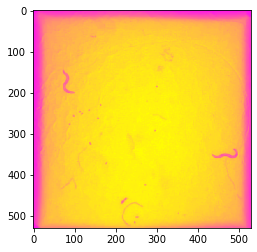

In [52]:
import gif

gif.plot_gif(np.load("../22956814/C3_raw_1.npy"), '../22956814/gif/C3_raw_1.gif', raw=True)

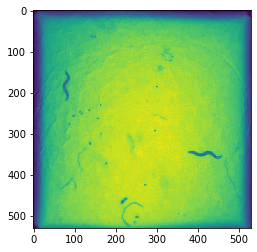

In [53]:
pic = np.load("../22956814/C3_raw_1.npy")[0]
plt.imshow(pic)

In [56]:
f = '../22956819/22956819_metadata.hdf5'
f = h5py.File(f)
f.keys()

<KeysViewHDF5 ['fov_wells', 'fov_wells_backup', 'full_data', 'mask', 'mean_intensity', 'provenance_tracking', 'timestamp']>

In [59]:
print(f['fov_wells'][0])

(71, 799, 76, 804, b'D8', 1)


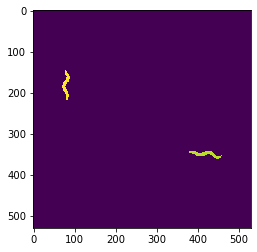

In [60]:
pic = np.load("../22956814/C3_mask_1.npy")[0]
plt.imshow(pic)